In [2]:
import numpy as np
from matplotlib import pyplot as plt

import WR620ZI as lecroy
lecroy.init("192.168.0.208")


*IDN?
*IDN LECROY,WR620ZI,LCRY2805N57162,8.5.1
successfully connected to Lecroy scope!


1

In [2]:
##################################################
##           configure LeCroy Scope             ##
##################################################

#lecroy.clear_all()

# set horizontal scaling, time/div
tdiv=50e-9
lecroy.set_tdiv(tdiv)

lecroy.set_trigger_delay(-4*tdiv) # t0 = 10% of screen

# access scope channels by labels,
# for easy re-mapping of scope channels without
# touching your below measurement automation
s = {
    "DUT_IN"   :"C4", 
    "DUT_OUT"  :"C2"  
}

# access scope measurements by labels
m = {
    "DUT_OUT_RISE"   : "p1",
    "DUT_OUT_FALL"   : "p2",
    "DUT_OUT_WIDTH"   : "p3"
}

# set up measurements for rise time, fall time and pulse width
lecroy.setup_measurement(m["DUT_OUT_FALL"],  s["DUT_OUT"], "rise")
lecroy.setup_measurement(m["DUT_OUT_RISE"],  s["DUT_OUT"], "fall")
lecroy.setup_measurement(m["DUT_OUT_WIDTH"], s["DUT_OUT"], "width")

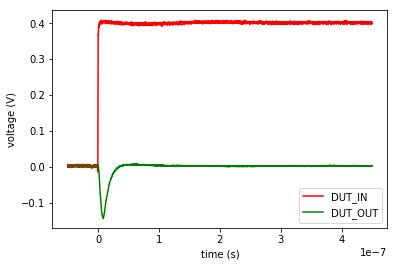

In [3]:
##################################################
##              capture waveforms               ##
##################################################

time, wfm = lecroy.capture_waveforms([
    s["DUT_IN"],
    s["DUT_OUT"]
  ],
    average=10
)

plt.plot(time, wfm[s["DUT_IN"]], "r" ,label="DUT_IN")
plt.plot(time, wfm[s["DUT_OUT"]],"g" ,label="DUT_OUT")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

In [4]:
##################################################
##          use built-in measurements           ##
##################################################

n_samples = 100

vals = lecroy.measure_statistics([m["DUT_OUT_RISE"],m["DUT_OUT_FALL"]],n_samples)

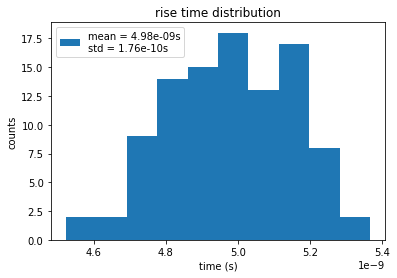

In [5]:

## calculate some simple statistics
rise_mean = np.mean(vals[m["DUT_OUT_RISE"]])
rise_std  = np.std(vals[m["DUT_OUT_RISE"]])

## plot recorded data as histogram
plt.hist(vals[m["DUT_OUT_RISE"]], label="mean = {:3.2e}s\nstd = {:3.2e}s".format(rise_mean,rise_std)) 
#plt.hist(vals[m["DUT_OUT_RISE"]], bins = np.arange(0,5,0.05))
plt.title("rise time distribution") 
plt.xlabel("time (s)")
plt.ylabel("counts")
plt.legend()
plt.show()